<a href="https://colab.research.google.com/github/sudhrathore/sudhanshu_AIMLBootcamp_Genzeon_2023/blob/main/Social_Media_threat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
dataset='/content/drive/MyDrive/dataset.json'
import pandas as pd
df=pd.read_json(dataset,lines=True)
df.head()

,content,annotation,extras
0,Get fucking real dude.,"{'notes': '', 'label': ['1']}",NaN
1,She is as dirty as they come and that crook ...,"{'notes': '', 'label': ['1']}",NaN
2,why did you fuck it up. I could do it all day...,"{'notes': '', 'label': ['1']}",NaN
3,Dude they dont finish enclosing the fucking s...,"{'notes': '', 'label': ['1']}",NaN
4,WTF are you talking about Men? No men thats n...,"{'notes': '', 'label': ['1']}",NaN


In [ ]:
df['label']=df['annotation'].apply(lambda x: (x.get('label')[0]))

In [ ]:
df.head()

,content,annotation,extras,label
0,Get fucking real dude.,"{'notes': '', 'label': ['1']}",NaN,1
1,She is as dirty as they come and that crook ...,"{'notes': '', 'label': ['1']}",NaN,1
2,why did you fuck it up. I could do it all day...,"{'notes': '', 'label': ['1']}",NaN,1
3,Dude they dont finish enclosing the fucking s...,"{'notes': '', 'label': ['1']}",NaN,1
4,WTF are you talking about Men? No men thats n...,"{'notes': '', 'label': ['1']}",NaN,1


In [ ]:
df.drop(['annotation','extras'],axis=1)

,content,label
0,Get fucking real dude.,1
1,She is as dirty as they come and that crook ...,1
2,why did you fuck it up. I could do it all day...,1
3,Dude they dont finish enclosing the fucking s...,1
4,WTF are you talking about Men? No men thats n...,1
...,...,...
19996,I dont. But what is complaining about it goi...,0
19997,Bahah yeah i&;m totally just gonna&; get pis...,0
19998,hahahahaha >:) im evil mwahahahahahahahahaha,0
19999,What&;s something unique about Ohio? :),0


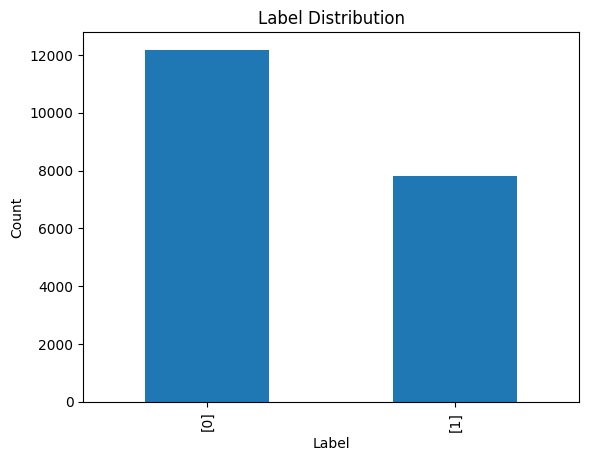

In [ ]:
label_counts = df['label'].value_counts()

label_counts.plot(kind='bar')




plt.xlabel('Label')

plt.ylabel('Count')

plt.title('Label Distribution')




# Display the plot

plt.show()

In [ ]:
import nltk
nltk.download(['punkt','wordnet']) #lexical db fro english lang #punkt-tokenizer model for various lang
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['content'], df['label'], test_size=0.2, random_state=42)



In [ ]:
from nltk.stem import WordNetLemmatizer

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
from nltk.corpus.reader import wordnet
def get_wordnet_pos_tag(word):
  tag=nltk.pos_tag([word])[0][1][0]
  tag_dict={
      "J":wordnet.ADJ,
      "R":wordnet.ADV,
      "N":wordnet.NOUN,
      "V":wordnet.VERB
  }
  return tag_dict.get(tag,wordnet.NOUN) #default tag -POS tag - when the word not classifies as any predefined POS

def tokenize_lemma(text):
  tokens=nltk.word_tokenize(text)
  lemm=WordNetLemmatizer()

  clean_tokens=[]
  for tok in tokens:
    lemm.lemmatize(tok,get_wordnet_pos_tag(tok))
    clean_tokens.append(lemm.lemmatize(tok,get_wordnet_pos_tag(tok)))

  return clean_tokens

tokenize_lemma("My grandma is very caring. The striped bats are hanging on their feet")

['My',
 'grandma',
 'be',
 'very',
 'care',
 '.',
 'The',
 'strip',
 'bat',
 'be',
 'hang',
 'on',
 'their',
 'foot']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vect=CountVectorizer(tokenizer=tokenize_lemma)#remove punctuations, lowercase, tokenization, freqmatrix
#acces the tokenization and introduce lemma in that



In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf=TfidfTransformer()

In [ ]:
#train our model
x_train_count=vect.fit_transform(X_train)
x_train_tfidf=tfidf.fit_transform(x_train_count)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
#train our model
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x_train_tfidf, y_train)

DecisionTreeClassifier()

In [ ]:
y_train

3728     [1]
8958     [0]
7671     [1]
5999     [1]
5751     [1]
        ... 
11284    [0]
11964    [0]
5390     [1]
860      [1]
15795    [0]
Name: label, Length: 16000, dtype: object